In [ ]:
#### E-commerce Text Classification  

In [ ]:
#  The objective of the project is to classify e-commerce products into 2 categories, based on its description available 
#  in the e-commerce platforms.
#  The categories are:  Household, Books

In [204]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# For Preprocesssing Text Data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

# Visualizing Wordcloud
from wordcloud import WordCloud

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# Check Performance
from sklearn.metrics import classification_report


[nltk_data] Downloading package omw-1.4 to C:\Users\RAJESH
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [205]:
data= pd.read_csv("C:\\Users\\RAJESH KUMAR\\Documents\\ecommerceDataset.csv")

In [206]:
# Fitler - such is binary classification
data= data[data['Household'].isin(['Household','Books'])]

In [207]:
# Rename Col Names
data.columns = ['Category', 'Comment']

In [208]:
data.head()

,Category,Comment
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31132 entries, 0 to 31131
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  31132 non-null  object
 1   Comment   31132 non-null  object
dtypes: object(2)
memory usage: 729.7+ KB


In [212]:
# Create Length Feature
data['text_length'] = data['Comment'].apply(lambda x : len(x))

<Axes: ylabel='Frequency'>

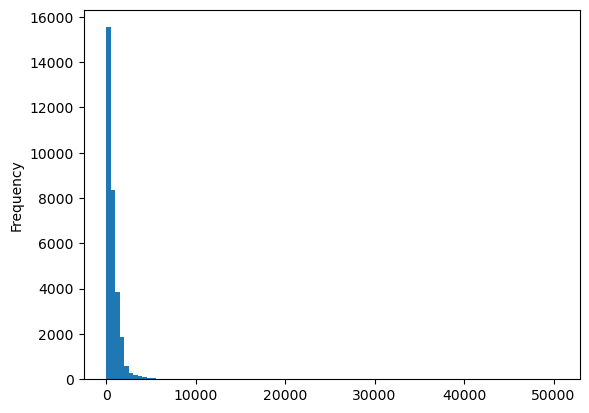

In [213]:
data['text_length'].plot.hist(bins = 100)

In [177]:
###### CLEAN DATA

In [214]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [215]:
# Remove Puctuations
data['Comment'] = data['Comment'].apply(remove_punctuations)


In [216]:
# Get Stopwords
stop = stopwords.words('english')

In [217]:
# Remove Stop Words
data['Comment'] = data['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [218]:
# Instance of Lemmatizer
wordnet = WordNetLemmatizer()

In [219]:
# Lemmatize
data['Comment'] = data['Comment'].apply(lambda x: wordnet.lemmatize(x))

In [220]:
# Create Length Feature
data['post_text_length'] = data['Comment'].apply(lambda x : len(x))

In [221]:
data.head()

,Category,Comment,text_length,post_text_length
0,Household,SAF Floral Framed Painting Wood 30 inch x 10 i...,346,271
1,Household,SAF UV Textured Modern Art Print Framed Painti...,1316,853
2,Household,SAF Flower Print Framed Painting Synthetic 135...,1091,694
3,Household,Incredible Gifts India Wooden Happy Birthday U...,989,970
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,1745,1387


In [222]:
## visualization

Text(0.5, 1.0, 'Category Distribution')

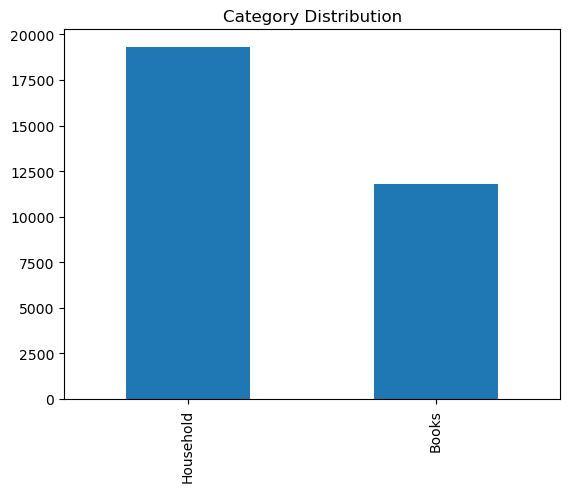

In [224]:
data['Category'].value_counts().plot(kind='bar')
plt.title('Category Distribution')

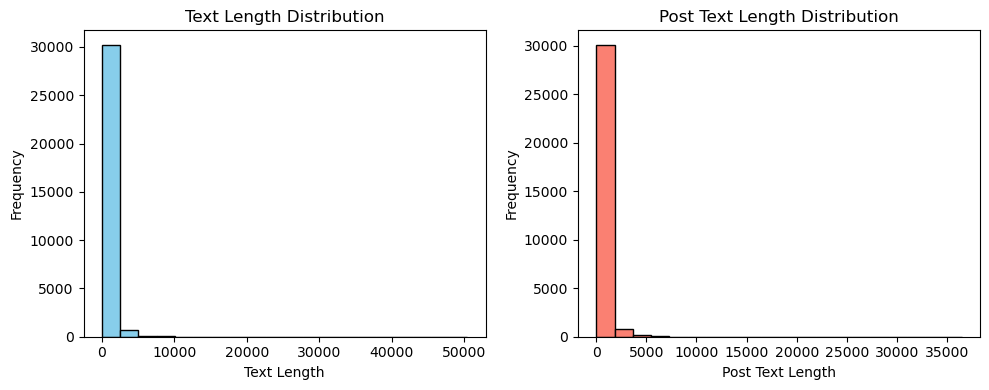

In [225]:
# Histograms for Text Length and Post Text Length
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['post_text_length'], bins=20, color='salmon', edgecolor='black')
plt.title('Post Text Length Distribution')
plt.xlabel('Post Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

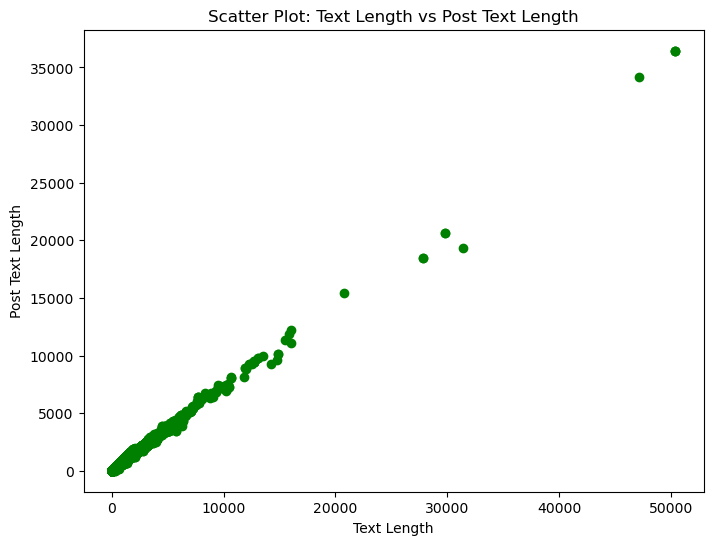

In [226]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['text_length'], data['post_text_length'], color='green')
plt.title('Scatter Plot: Text Length vs Post Text Length')
plt.xlabel('Text Length')
plt.ylabel('Post Text Length')
plt.show()

In [231]:
#### converting text to numeric 

In [232]:
# Convert 'Category' column to numerical labels
category_mapping = {category: idx for idx, category in enumerate(data['Category'].unique())}
data['Category'] = data['Category'].map(category_mapping)

In [233]:
# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Comment'])

In [234]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Category'], test_size=0.2, random_state=42)

In [235]:
### model 1 : logistic regression 

In [236]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report

In [237]:
model = LogisticRegression()

In [238]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [239]:
# Predict using logistic regression model
y_pred_lr =model.predict(X_test)

In [240]:
# Evaluate models
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [241]:
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
report_lr = classification_report(y_test, y_pred_lr)
print('Logistic Regression Classification Report:')
print(report_lr)

Logistic Regression Accuracy: 96.79%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3905
           1       0.97      0.94      0.96      2322

    accuracy                           0.97      6227
   macro avg       0.97      0.96      0.97      6227
weighted avg       0.97      0.97      0.97      6227



In [ ]:
## model 2 : decision tree 

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [244]:
# Predict
y_pred_dt = decision_tree_model.predict(X_test)

In [245]:
# evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [246]:
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')
report_dt = classification_report(y_test, y_pred_dt)
print('Decision Tree Classification Report:')
print(report_dt)

Decision Tree Accuracy: 97.11%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3905
           1       0.96      0.96      0.96      2322

    accuracy                           0.97      6227
   macro avg       0.97      0.97      0.97      6227
weighted avg       0.97      0.97      0.97      6227



In [247]:
#### model 3 : random forest

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [250]:
y_pred_rf = random_forest_model.predict(X_test)

In [251]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [252]:
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 98.19%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3905
           1       0.98      0.97      0.98      2322

    accuracy                           0.98      6227
   macro avg       0.98      0.98      0.98      6227
weighted avg       0.98      0.98      0.98      6227



In [253]:
#### model  4: naive bayes 

In [254]:
from sklearn.naive_bayes import MultinomialNB

In [255]:
# Initialize and train Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [256]:
# Predict using Naive Bayes classifier
y_pred_nb = naive_bayes_model.predict(X_test)

In [257]:
# Evaluate models
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [258]:
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')
report_nb = classification_report(y_test, y_pred_nb)
print('Naive Bayes Classification Report:')
print(report_nb)

Naive Bayes Accuracy: 94.09%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3905
           1       0.98      0.86      0.92      2322

    accuracy                           0.94      6227
   macro avg       0.95      0.92      0.94      6227
weighted avg       0.94      0.94      0.94      6227



In [259]:
#### model 5 : support vector classifier 

In [260]:
from sklearn.svm import SVC

In [261]:
# Initialize and train Support Vector Machine classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [262]:
# Predict using SVM classifier
y_pred_svm = svm_model.predict(X_test)

In [263]:
# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [264]:
print(f'Support Vector Machine Accuracy: {accuracy_svm * 100:.2f}%')
report_svm = classification_report(y_test, y_pred_svm)
print('Support Vector Machine Classification Report:')
print(report_svm)

Support Vector Machine Accuracy: 98.11%
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3905
           1       0.99      0.96      0.97      2322

    accuracy                           0.98      6227
   macro avg       0.98      0.98      0.98      6227
weighted avg       0.98      0.98      0.98      6227



In [265]:
## model 6: KNN CLASSIFIER

In [266]:
from sklearn.neighbors import KNeighborsClassifier

In [267]:
# Initialize and train KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [268]:
# Predict using KNN classifier
y_pred_knn = knn_model.predict(X_test)

In [269]:
# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [270]:
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')
report_knn = classification_report(y_test, y_pred_knn)
print('KNN Classification Report:')
print(report_knn)

KNN Accuracy: 82.00%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      3905
           1       0.68      0.98      0.80      2322

    accuracy                           0.82      6227
   macro avg       0.83      0.85      0.82      6227
weighted avg       0.87      0.82      0.82      6227



In [271]:
## MODEL EVALUATION 

In [272]:
Model = ['logistic', 'decision tree', 'random forest', 'naive bayes','svc','knn']
Accuracy = [96.79, 97.24,98.22 ,94.09,98.11, 82.00]  


In [273]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model Name': Model,
    'Accuracy': Accuracy
})

In [274]:
# Display the results table
print(results_df)

      Model Name  Accuracy
0       logistic     96.79
1  decision tree     97.24
2  random forest     98.22
3    naive bayes     94.09
4            svc     98.11
5            knn     82.00
